In [136]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
cw1 = pd.read_csv('coursework_1_data_2019.csv')

In [3]:
cw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   local_authority_area          152 non-null    object 
 1   2008_cases_total              152 non-null    int64  
 2   2013_cases_total              152 non-null    int64  
 3   2018_cases_total              152 non-null    int64  
 4   2008_pop_total                152 non-null    int64  
 5   2013_pop_total                152 non-null    int64  
 6   2018_pop_total                152 non-null    int64  
 7   pupulation_change_percentage  152 non-null    float64
 8   case_change_percentage        152 non-null    float64
 9   2008_cases_male               152 non-null    int64  
 10  2013_cases_male               152 non-null    int64  
 11  2018_cases_male               152 non-null    int64  
 12  2008_pop_male                 152 non-null    int64  
 13  2013_

In [4]:
cw1.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,pupulation_change_percentage,case_change_percentage,2008_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,5.2668,28.6678,187,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,4.5589,43.4137,212,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,13.7276,46.3889,148,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,5.9952,8.3333,157,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,7.7618,18.0064,138,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


delete the 'local_authority_area','2013_cases_total','2018_cases_total','2013_pop_total','2018_pop_total'.
Because I have already made the pupulation_change_percentage & case_change_percentage

also delete the 'total_budget', because which can be calculated as the sum of other budgets, 
without deleting them, the model will be with multicollinearity

In [5]:
cw1_d1 = cw1.drop(['local_authority_area','2013_cases_total','2018_cases_total','2013_pop_total','2018_pop_total','total_budget'], axis=1)

In [6]:
cw1_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   2008_cases_total              152 non-null    int64  
 1   2008_pop_total                152 non-null    int64  
 2   pupulation_change_percentage  152 non-null    float64
 3   case_change_percentage        152 non-null    float64
 4   2008_cases_male               152 non-null    int64  
 5   2013_cases_male               152 non-null    int64  
 6   2018_cases_male               152 non-null    int64  
 7   2008_pop_male                 152 non-null    int64  
 8   2013_pop_male                 152 non-null    int64  
 9   2018_pop_male                 152 non-null    int64  
 10  2008_cases_female             152 non-null    int64  
 11  2013_cases_female             152 non-null    int64  
 12  2018_cases_female             152 non-null    int64  
 13  2008_

I think the sex does not influnece the cases changing rate, the more important things should be the total population.

So, these data colums with sex will be delated

In [7]:
cw1_d2 = cw1_d1.drop(['2008_cases_male','2013_cases_male','2018_cases_male',
                      '2008_pop_male','2013_pop_male','2018_pop_male',
                      '2008_cases_female','2013_cases_female','2018_cases_female',
                      '2008_pop_female','2013_pop_female','2018_pop_female'], axis=1)

change into numeric

In [8]:
cw1_numeric = pd.get_dummies(cw1_d2)

In [9]:
# check out the new dataFrame
cw1_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   2008_cases_total                              152 non-null    int64  
 1   2008_pop_total                                152 non-null    int64  
 2   pupulation_change_percentage                  152 non-null    float64
 3   case_change_percentage                        152 non-null    float64
 4   clean_air                                     152 non-null    int64  
 5   clean_environ                                 152 non-null    int64  
 6   health_training                               152 non-null    int64  
 7   school_awareness                              152 non-null    int64  
 8   media_awareness                               152 non-null    int64  
 9   sub_counselling                               152 non-null    int

### Because the gap of the name will cauase error later, so some name of the column will be changed
### Meanwhile, the number cannot be the start of a variable, so 2008_cases_total and 2008_pop_total need to be changed

In [10]:
cw1_numeric_transferd = cw1_numeric.rename(columns = {"2008_cases_total":"A2008_cases_total","2008_pop_total":"A2008_pop_total",
                                                      "region_East Midlands":"region_East_Midlands","region_East of England":"region_East_of_England",
                                                      "region_North East":"region_North_East","region_North West":"region_North_West",
                                                      "region_South East":"region_South_East","region_South West":"region_South_West",
                                                      "region_West Midlands":"region_West_Midlands","region_Yorkshire and the Humber":"region_Yorkshire_and_the_Humber"})

In [11]:
cw1_numeric_transferd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   A2008_cases_total                             152 non-null    int64  
 1   A2008_pop_total                               152 non-null    int64  
 2   pupulation_change_percentage                  152 non-null    float64
 3   case_change_percentage                        152 non-null    float64
 4   clean_air                                     152 non-null    int64  
 5   clean_environ                                 152 non-null    int64  
 6   health_training                               152 non-null    int64  
 7   school_awareness                              152 non-null    int64  
 8   media_awareness                               152 non-null    int64  
 9   sub_counselling                               152 non-null    int

In [12]:
cw1_numeric_transferd.head()

,A2008_cases_total,A2008_pop_total,pupulation_change_percentage,case_change_percentage,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,...,region_North_West,region_South_East,region_South_West,region_West_Midlands,region_Yorkshire_and_the_Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_other_london,local_authority_type_unitary_authority
0,593,172684,5.2668,28.6678,21000,22000,18000,41000,18000,19000,...,0,0,0,0,0,1,0,0,0,0
1,539,340435,4.5589,43.4137,50000,17000,23000,74000,30000,26000,...,0,0,0,0,0,1,0,0,0,0
2,360,226755,13.7276,46.3889,41000,45000,5000,26000,29000,14000,...,0,0,0,0,1,0,1,0,0,0
3,456,178625,5.9952,8.3333,33000,42000,19000,50000,10000,7000,...,0,0,1,0,0,0,0,0,0,1
4,311,158185,7.7618,18.0064,37000,52000,17000,8000,3000,13000,...,0,0,0,0,0,0,0,0,0,1


There are 9 regions, and 5 local authority types in total

Hopefully, to avoid multicollinearity, 1 region and 1 local authority types will be deleted.

# test the linear regression directly with multicollinearity of regions and local authority types

In [13]:
model_1_variables = cw1_numeric_transferd.loc[:,['case_change_percentage','A2008_cases_total','A2008_pop_total','pupulation_change_percentage','clean_air','clean_environ','health_training',
                                      'school_awareness','media_awareness','sub_counselling','region_East_Midlands','region_East_of_England','region_London',
                                      'region_North_East','region_North_West','region_South_East','region_South_West','region_West_Midlands','region_Yorkshire_and_the_Humber',
                                      'local_authority_type_london_borough','local_authority_type_metropolitan_borough','local_authority_type_non_metropolitan_county',
                                      'local_authority_type_other_london','local_authority_type_unitary_authority']]

In [14]:
model_1 = sm.formula.ols('case_change_percentage ~ A2008_cases_total + A2008_pop_total + pupulation_change_percentage + clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling + region_East_Midlands + region_East_of_England + region_London +  region_North_East + region_North_West + region_South_East + region_South_West + region_West_Midlands + region_Yorkshire_and_the_Humber + local_authority_type_london_borough + local_authority_type_metropolitan_borough + local_authority_type_non_metropolitan_county + local_authority_type_other_london + local_authority_type_unitary_authority', model_1_variables).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     case_change_percentage   R-squared:                       0.675
Model:                                OLS   Adj. R-squared:                  0.626
Method:                     Least Squares   F-statistic:                     13.63
Date:                    Sun, 14 Nov 2021   Prob (F-statistic):           3.61e-23
Time:                            10:40:24   Log-Likelihood:                -518.72
No. Observations:                     152   AIC:                             1079.
Df Residuals:                         131   BIC:                             1143.
Df Model:                              20                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        7.9550      1.495      5.321      0.000       4.998      10.912
A2008_cases_total                               -0.0060      0.002     -3.854      0.000      -0.009      -0.003
A2008_pop_total                               9.632e-05   2.05e-05      4.697      0.000    5.58e-05       0.000
pupulation_change_percentage                     1.1339      0.106     10.654      0.000       0.923       1.344
clean_air                                    -7.521e-05   3.13e-05     -2.401      0.018      -0.000   -1.32e-05
clean_environ                                   -0.0001   3.26e-05     -3.333      0.001      -0.000   -4.42e-05
health_training                              -7.431e-05   5.29e-05     -1.405      0.162      -0.000    3.03e-05
school_awareness                                -0.0002   3.22e-05     -5.085      0.000      -0.000      -0.000
media_awareness                               1.074e-05   4.05e-05      0.265      0.791   -6.94e-05    9.09e-05
sub_counselling                              -8.562e-05    6.9e-05     -1.241      0.217      -0.000    5.08e-05
region_East_Midlands                            -2.6563      2.879     -0.923      0.358      -8.353       3.040
region_East_of_England                          -2.3533      2.557     -0.920      0.359      -7.412       2.705
region_London                                    8.1991      2.612      3.139      0.002       3.032      13.366
region_North_East                                5.9616      2.253      2.646      0.009       1.505      10.419
region_North_West                                2.6944      1.850      1.456      0.148      -0.966       6.354
region_South_East                                2.1279      2.078      1.024      0.308      -1.984       6.240
region_South_West                               -5.4870      2.055     -2.670      0.009      -9.552      -1.422
region_West_Midlands                            -2.6888      2.273     -1.183      0.239      -7.186       1.808
region_Yorkshire_and_the_Humber                  2.1574      2.155      1.001      0.319      -2.107       6.421
local_authority_type_london_borough             12.0859      3.189      3.789      0.000       5.776      18.395
local_authority_type_metropolitan_borough        4.3307      1.577      2.746      0.007       1.211       7.450
local_authority_type_non_metropolitan_county    -3.8588      2.749     -1.404      0.163      -9.297       1.580
local_authority_type_other_london               -3.8868      5.611     -0.693      0.490     -14.987       7.213
local_authority_type_unitary_authority          -0.7160      1.254     -0.571      0.569      -3.196 

Text(0.5, 1.0, 'Correlation Matrix')

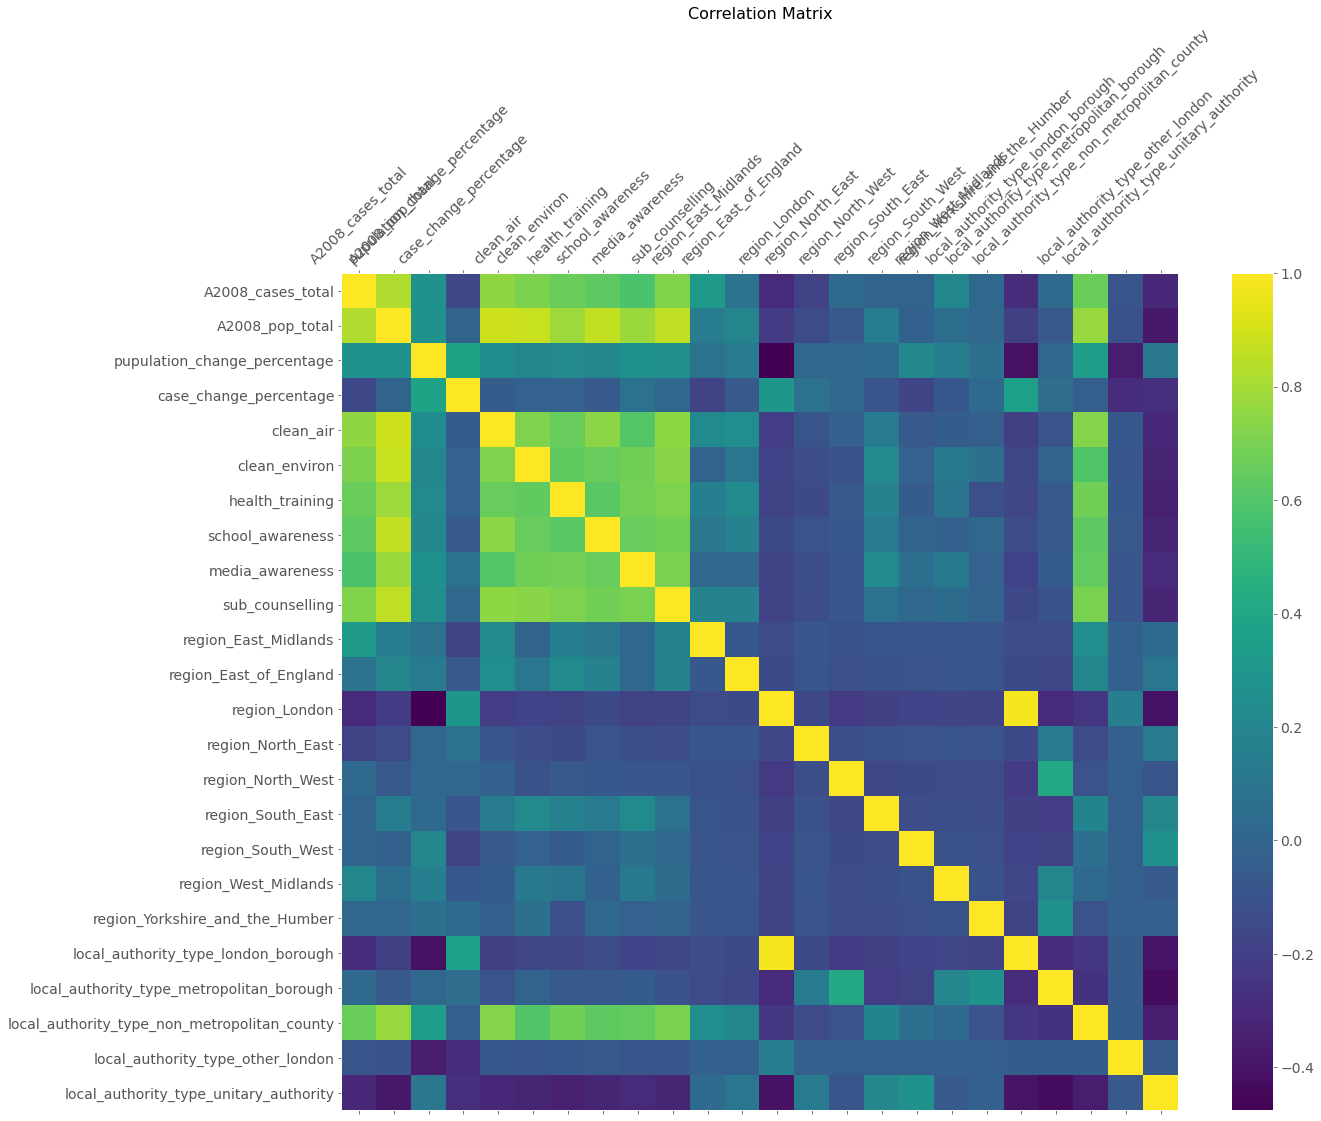

In [15]:
df = cw1_numeric_transferd
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# Using VIF to deal with multicollinearity

In [16]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [17]:
cw1_numeric_transferd.columns

Index(['A2008_cases_total', 'A2008_pop_total', 'pupulation_change_percentage',
       'case_change_percentage', 'clean_air', 'clean_environ',
       'health_training', 'school_awareness', 'media_awareness',
       'sub_counselling', 'region_East_Midlands', 'region_East_of_England',
       'region_London', 'region_North_East', 'region_North_West',
       'region_South_East', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber',
       'local_authority_type_london_borough',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_other_london',
       'local_authority_type_unitary_authority'],
      dtype='object')

In [18]:
# using VIF on the dataset
cw1_selected_VIF = drop_column_using_vif_(cw1_numeric_transferd.drop('case_change_percentage', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(cw1_selected_VIF.columns)

Dropping: region_East_Midlands
Dropping: region_London
Dropping: local_authority_type_london_borough
Dropping: A2008_pop_total
Dropping: local_authority_type_unitary_authority
The columns remaining after VIF selection are:
Index(['A2008_cases_total', 'pupulation_change_percentage', 'clean_air',
       'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling', 'region_East_of_England',
       'region_North_East', 'region_North_West', 'region_South_East',
       'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_other_london'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Now we use the statsmodels.api.OLS to build and fit a linear regression model.

In [19]:
model_1_VIF = sm.OLS(endog=cw1_numeric_transferd[['case_change_percentage']], exog=sm.add_constant(cw1_selected_VIF)).fit()
model_1_VIF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     case_change_percentage   R-squared:                       0.518
Model:                                OLS   Adj. R-squared:                  0.453
Method:                     Least Squares   F-statistic:                     7.955
Date:                    Sun, 14 Nov 2021   Prob (F-statistic):           7.33e-14
Time:                            10:40:27   Log-Likelihood:                -548.70
No. Observations:                     152   AIC:                             1135.
Df Residuals:                         133   BIC:                             1193.
Df Model:                              18                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           26.0476      1.958     13.301      0.000      22.174      29.921
A2008_cases_total                               -0.0071      0.002     -4.283      0.000      -0.010      -0.004
pupulation_change_percentage                     1.0053      0.127      7.937      0.000       0.755       1.256
clean_air                                     3.537e-06   3.04e-05      0.116      0.908   -5.66e-05    6.37e-05
clean_environ                                 5.248e-05    2.3e-05      2.282      0.024       7e-06     9.8e-05
health_training                               1.347e-05   5.99e-05      0.225      0.822      -0.000       0.000
school_awareness                              -3.32e-05   2.35e-05     -1.413      0.160   -7.97e-05    1.33e-05
media_awareness                                  0.0001   4.53e-05      2.315      0.022    1.53e-05       0.000
sub_counselling                               1.874e-05   7.64e-05      0.245      0.807      -0.000       0.000
region_East_of_England                         -15.3676      3.565     -4.310      0.000     -22.419      -8.316
region_North_East                              -10.2243      3.436     -2.976      0.003     -17.020      -3.429
region_North_West                              -10.4051      3.087     -3.370      0.001     -16.512      -4.298
region_South_East                              -16.6245      2.951     -5.633      0.000     -22.462     -10.787
region_South_West                              -21.2587      3.100     -6.858      0.000     -27.390     -15.128
region_West_Midlands                           -16.7495      3.603     -4.649      0.000     -23.876      -9.623
region_Yorkshire_and_the_Humber                -12.4758      3.462     -3.604      0.000     -19.323      -5.628
local_authority_type_metropolitan_borough        3.4876      2.597      1.343      0.182      -1.649       8.624
local_authority_type_non_metropolitan_county    -1.5655      3.756     -0.417      0.677      -8.994       5.863
local_authority_type_other_london              -22.1925     10.456     -2.122      0.036     -42.875      -1.510
==============================================================================
Omnibus:                       26.478   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.490
Skew:                          -0.129   Prob(JB):                     5.27e-41
Kurtosis:                       8.406   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is 

## It seems that VIF cannot let the model to be perfect, which is still with strong multicollinearity.
There comes to 2 methods to continue, to use VIF iternatively
Or, make use of the correlation matrix

## 1st method, use correlation matrix. I set a thresold of ....
I delete the columns below

clean_air, clean_environ, health_training, school_awareness, media_awareness, sub_counselling

In [80]:
cw1_selected_VIF_CM = cw1_selected_VIF.drop(
    ['clean_air','clean_environ','health_training','school_awareness','media_awareness','sub_counselling','local_authority_type_non_metropolitan_county','A2008_cases_total'], axis=1)

In [21]:
cw1_selected_VIF_CM.columns


Index(['pupulation_change_percentage', 'region_East_of_England',
       'region_North_East', 'region_North_West', 'region_South_East',
       'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_other_london'],
      dtype='object')

In [87]:
model_1_VIF_CM = sm.OLS(endog=cw1_numeric_transferd[['case_change_percentage']], exog=sm.add_constant(cw1_selected_VIF_CM)).fit()
model_1_VIF_CM.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     case_change_percentage   R-squared:                       0.383
Model:                                OLS   Adj. R-squared:                  0.339
Method:                     Least Squares   F-statistic:                     8.743
Date:                    Sun, 14 Nov 2021   Prob (F-statistic):           4.71e-11
Time:                            18:32:52   Log-Likelihood:                -567.57
No. Observations:                     152   AIC:                             1157.
Df Residuals:                         141   BIC:                             1190.
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        23.8354      1.663     14.334      0.000      20.548      27.123
pupulation_change_percentage                  0.8998      0.130      6.927      0.000       0.643       1.157
region_East_of_England                      -15.4953      3.731     -4.153      0.000     -22.871      -8.120
region_North_East                            -7.4650      3.700     -2.018      0.046     -14.779      -0.151
region_North_West                           -11.4494      3.348     -3.420      0.001     -18.067      -4.831
region_South_East                           -12.4755      2.989     -4.173      0.000     -18.385      -6.566
region_South_West                           -19.5698      3.318     -5.898      0.000     -26.129     -13.011
region_West_Midlands                        -17.2805      3.724     -4.641      0.000     -24.642      -9.919
region_Yorkshire_and_the_Humber             -11.7275      3.683     -3.184      0.002     -19.009      -4.446
local_authority_type_metropolitan_borough     4.1038      2.710      1.514      0.132      -1.254       9.461
local_authority_type_other_london           -22.9687     11.367     -2.021      0.045     -45.440      -0.497
==============================================================================
Omnibus:                       15.911   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.017
Skew:                           0.123   Prob(JB):                     1.13e-12
Kurtosis:                       5.937   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Now we store all the relevant values:
gradient  = model_1_VIF_CM.params[1]
intercept = model_1_VIF_CM.params[0]
Rsquared  = model_1_VIF_CM.rsquared
MSE       = model_1_VIF_CM.mse_resid
pvalue    = model_1_VIF_CM.f_pvalue

# And print them:
print("gradient  =", model_1_VIF_CM.params[1])
print("intercept =", model_1_VIF_CM.params[0])
print("Rsquared  =", model_1_VIF_CM.rsquared)
print("MSE       =", model_1_VIF_CM.mse_resid)
print("pvalue    =", model_1_VIF_CM.f_pvalue)


gradient  = 0.8997574751872481
intercept = 23.835371625330765
Rsquared  = 0.38273643259058643
MSE       = 110.53425149988108
pvalue    = 4.7062057623094096e-11


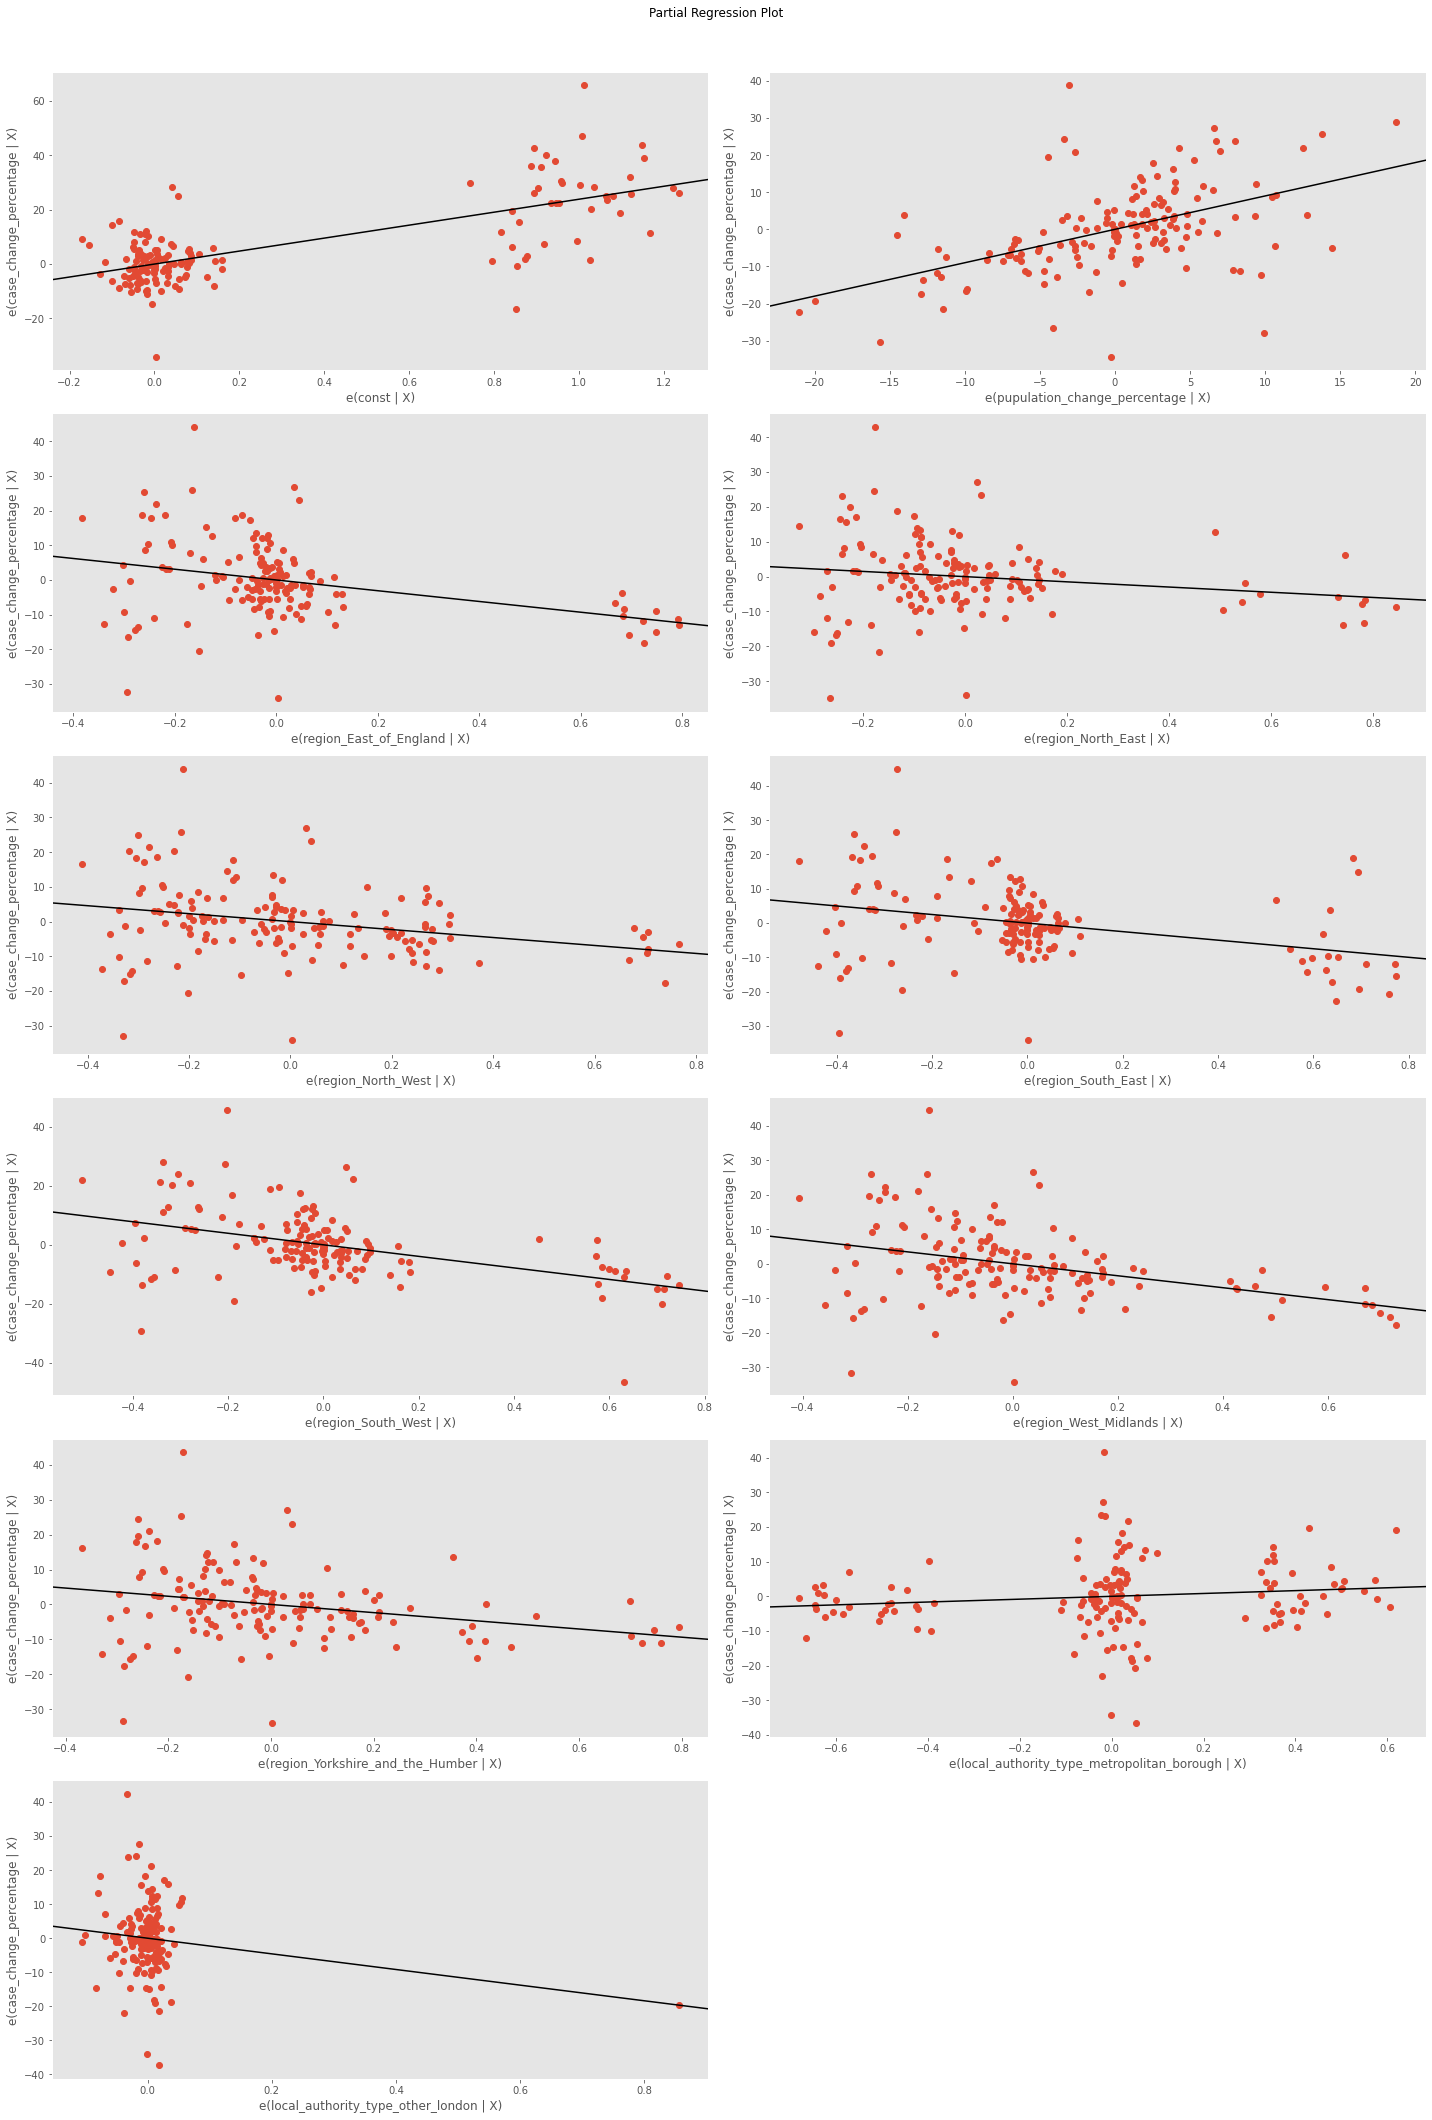

In [92]:
fig = plt.figure(figsize=(20,30))
fig = sm.graphics.plot_partregress_grid(
                 model_1_VIF_CM,  fig=fig)

 if R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size,

##  Now without multicollinearity

local_authority_type_other_london	has the biggest effect

cw1_selected_VIF_CM_3 should be the input(X) to the next models, 
case_change_percentage should be the output(Y) to the next models.

# Residual analysis


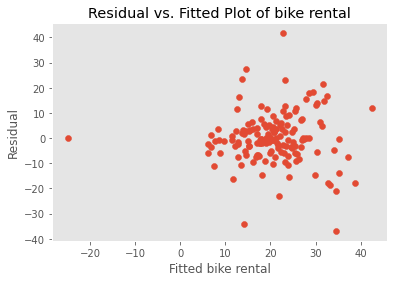

In [75]:
# plot 
plt.scatter(model_1_VIF_CM.fittedvalues, model_1_VIF_CM.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
plt.show()


Alternatively, we can use the 'Residual vs. predictor plot' for model diagnosis. As there are multiple variables, only one predictor can be displayed at a time.

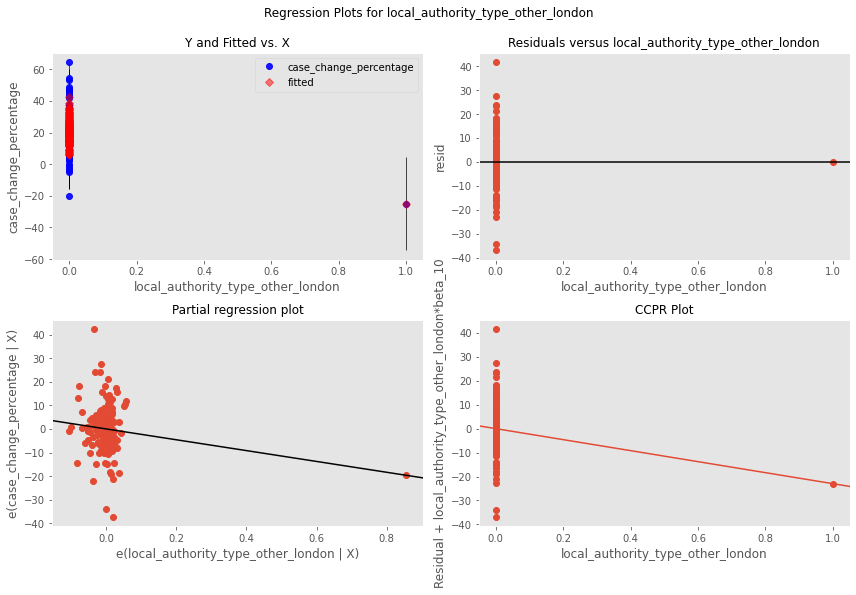

In [81]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_1_VIF_CM, 'local_authority_type_other_london', fig=fig)

# After the linear regression model

I don't think it's good to use logistic regression model to predict whether there would be a increase or decrease on cases(Counts of those who developed ‘Condition X’ )

## Making use of other possible models

## 1. A simple Artificial Neural Network with 3 hidden layer. Deep Neural Network

In [25]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

2021-11-14 10:40:39.578199: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-14 10:40:39.578247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
X = cw1_selected_VIF_CM
Y = cw1_numeric_transferd[['case_change_percentage']]

In [68]:
y_train.size

121

In [69]:
y_test.size

30

In [70]:
Y.size

152

In [62]:
X_train = X[31:]
y_train = Y[31:]
X_test = X[:30]
y_test = Y[:30]

In [63]:
x_standard_scaler = StandardScaler().fit(X_train)
y_standard_scaler = StandardScaler().fit(Y)
x_scaled = x_standard_scaler.transform(X_train)
y_scaled = y_standard_scaler.transform(y_train)

Epoch 1/300
13/13 [==============================] - 0s 2ms/step - loss: 0.9159
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 0.7760
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 0.7061
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6612
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6275
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6201
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5955
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5854
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5622
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5603
Epoch 11/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5665
Epoch 12/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5554
Epoch 13/300
13/13 [=================

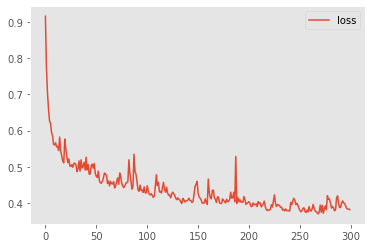

In [64]:
model_1 = Sequential()
model_1.add(Dense(50, input_dim=10, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(1))


model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(x_scaled, y_scaled, batch_size = 10, epochs=300).history
pd.DataFrame(history).plot()
plt.show()

In [65]:
y_pred_1 = model_1.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred_1)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 226.59
RMSE: 15.05


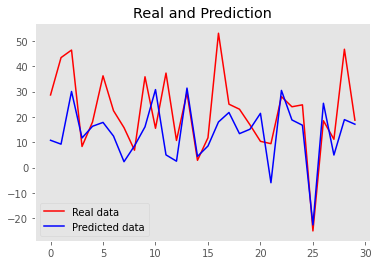

In [74]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted data')
plt.title('Real and Prediction')
plt.legend()
plt.show()

In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,851
Trainable params: 15,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_1.rsquared

AttributeError: 'Sequential' object has no attribute 'rsquared'

# Regression Example with XGBRegressor 
### XGBoost stands for "Extreme Gradient Boosting" and it is an implementation of gradient boosting trees algorithm. The XGBoost is a popular supervised machine learning model with characteristics like computation speed, parallelization, and performance. 

In [37]:
# gradient boosting for regression in scikit-learn
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [38]:
xgbr = xgb.XGBRegressor(booster='dart',eta=0.1,max_depth=6,subsample=0.6) 
print(xgbr)

XGBRegressor(base_score=None, booster='dart', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=6,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.6, tree_method=None,
             validate_parameters=None, verbosity=None)


In [39]:
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
#check the model training score.
print("Training score: ", score)
# apply the cross-validation method to evaluate the training score.
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Training score:  0.9516714361752988
Mean cross-validation score: -0.20


### Predict test data, then check the prediction accuracy. Here, we'll use MSE and RMSE as accuracy metrics.

In [72]:
y_pred_2 = xgbr.predict(X_test)

MSE: 174.75
RMSE: 13.22


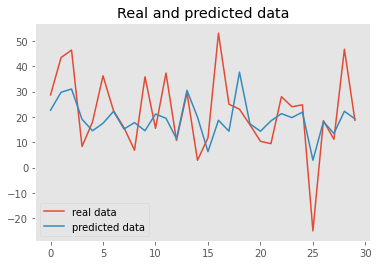

In [73]:
mse = mean_squared_error(y_test, y_pred_2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="real data")
plt.plot(x_ax, y_pred_2, label="predicted data")
plt.title("Real and predicted data")
plt.legend()
plt.show()